## Building and Training Single Layer Perceptron Model

In [1]:
import numpy as np

### Building the perceptron model

In [3]:
class Perceptron:

    def __init__(self, num_inputs, learning_rate = 0.01):
        # Initializing weight and learning rate
        self.weights = np.random.rand(num_inputs + 1)
        self.learning_rate = learning_rate

     # Define the first linear layer 
    def linear(self, inputs):
        Z = inputs @ self.weights[1:].T + self.weights[0] # linear transformation
        return Z

    # Define the Heaviside Step function (activation function)
    def step_function(self, z): # mimics a binary classifier's output
        if z >= 0:
            return 1
        else:
            return 0

     # Define the Prediction
    def predict(self, inputs):
        
        # to return predicted labels for given inputs
        Z = self.linear(inputs)
        
        try:
            pred = []
            for z in Z:
                pred.append(self.step_function(z))
        except:
            return self.step_function(Z)
        return pred
    
    # Define the Loss function
    def loss(self, prediction, target):
        loss = (prediction - target) # difference between predicted output and true label
        return loss

    #Define training
    def train(self, inputs, target):
        prediction = self.predict(inputs) # make a Prediction
        error = self.loss(prediction, target) # compute error
        
        self.weights[1:] += self.learning_rate * error * inputs # update Weights
        self.weights[0]  += self.learning_rate * error # update Bias

    # Fit the model
    def fit(self, X, y, num_epochs): # training the model on the entire dataset
        for epoch in range(num_epochs):
            for inputs, target in zip(X, y): # pairs each input sample with its corresponding label
                self.train(inputs, target)

### Import the necessary library

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Generating a linearly separable dataset with two classes

In [6]:
X, Y = make_blobs(n_samples = 1000, n_features=2, centers = 2, cluster_std = 3, random_state = 42)

### Splitting the dataset

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

In [8]:
# Scale the input features to have zero mean and unit variance

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Set the random seed legacy

np.random.seed(23)

### Initialize the Perceptron

In [12]:
perceptron = Perceptron(num_inputs = X_train.shape[1]) # columns of X_Train

In [13]:
perceptron.fit(X_train, Y_train, num_epochs = 100)

### Prediction

In [14]:
pred = perceptron.predict(X_test)

### Testing the accuracy of the trained Perceptron

In [16]:
accuracy = np.mean(pred != Y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.955


### Plotting the dataset

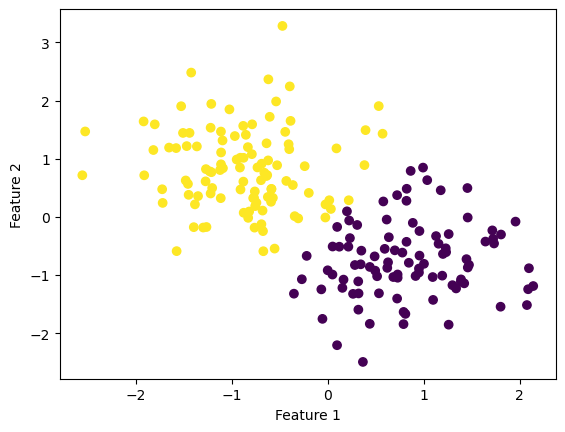

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()